In [3]:
import csv
import os
import numpy as np
from scipy.optimize import *  #curve_fit
from numpy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as colors
from scipy.ndimage.interpolation import rotate
from scipy.signal import savgol_filter
import cv2
%matplotlib notebook

#C:\Users\andre\Desktop\Specs image correction playgroundDesktopSPECS_IMAGE_TRANSFORMATION

In [4]:
corr = np.load("C:/Users/andre/Desktop/SPECS_IMAGE_TRANSFORMATION/MAM_mode/corrected.npy")
raw = np.load("C:/Users/andre/Desktop/SPECS_IMAGE_TRANSFORMATION/MAM_mode/raw.npy")

raw = raw.astype(np.float32)
corr = corr.astype(np.float32)


In [6]:

Ek                 = 510   # [eV], rr = (Ek - WF)/Ep = 1.02
Ep                 = 500   # [eV]
WF                 = 0   # [eV]
ERange             = [475 ,545]   # [eV], (ERange - Ek)/Ep = -0.07 0.07
aRange             = [-10, 10]   # [deg]
De1                = 0.00333333   # [eV/(mm_y Ep)]
aInner             = 10   # [deg]
eShift             = [-0.07, 0 ,0.07]   # [Ep]
Da1                = [0.9278 , 0.9626 ,0.9506  ] # [mm_z/deg]
Da3                = [0.03114,  0.1801, 0.386  ] # [mm_z/deg^3]
Da5                = [-0.1338,  -0.2192 ,-0.3339 ]  # [mm_z/deg^5]
Da7                = [0.03429, 0.05841 ,0.0881]   # [mm_z/deg^7]
pixel_size         = [0.0099, 0.0099]   # [mm]
magnification      = 4.38
offset             = [0 ,0 ]  # [px]
interpolation_mode = 22
intensity_scaling  = 1
eGrid              = 0.01   # [Ep]
aGrid              = 1   # [deg]
Detector_size = [1302, 1040] ## pixels


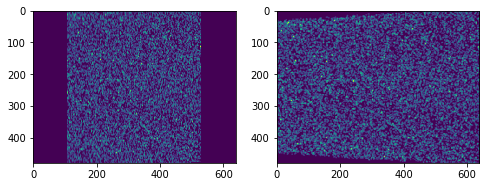

In [7]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.imshow(corr)
plt.subplot(1,2,2)
plt.imshow(raw)
plt.show()

<IPython.core.display.Javascript object>


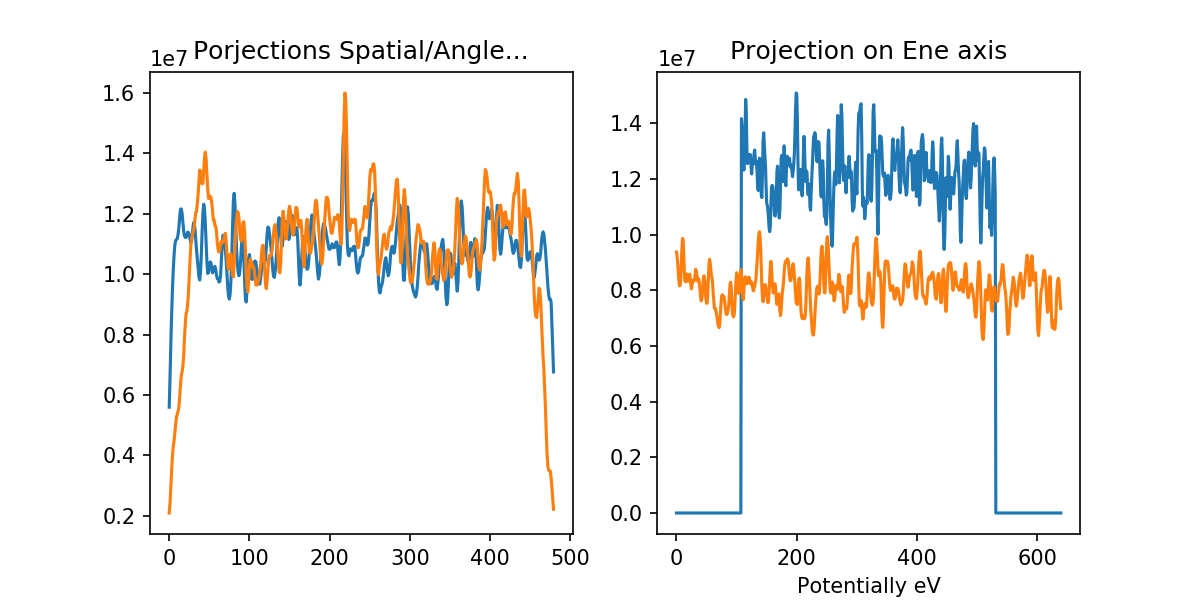

In [13]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.title("Porjections Spatial/Angle...")
plt.plot(np.sum(corr, axis = 1))
plt.plot(np.sum(raw, axis = 1))
plt.subplot(1,2,2)
plt.title("Projection on Ene axis")
plt.plot(np.sum(corr, axis = 0))
plt.plot(np.sum(raw, axis = 0))
plt.xlabel("Potentially eV")

plt.show()

In [5]:
pts1 = np.float32([[0,35],[640,35],[640,450],[0,450]])
pts2 = np.float32([[107,0],[530,0],[530,480],[107,480]])

#pts1 = np.float32([[0,33],[640,0],[640,480],[0,450]])
#pts2 = np.float32([[107,0],[530,0],[530,480],[107,480]])

M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(raw,M,(640,480))
print(M)

[[ 6.60937500e-01  3.56659147e-15  1.07000000e+02]
 [ 1.06165077e-15  1.15662651e+00 -4.04819277e+01]
 [ 4.96022494e-18  1.08149167e-17  1.00000000e+00]]


<IPython.core.display.Javascript object>


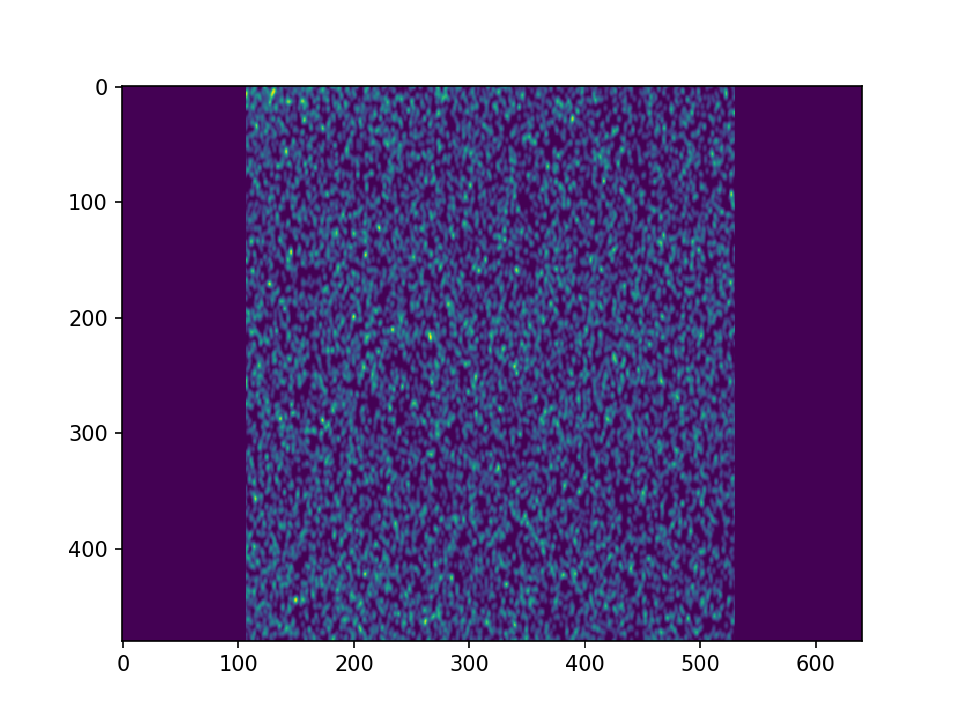

In [14]:
plt.figure()
plt.imshow(dst)
plt.show()

<IPython.core.display.Javascript object>


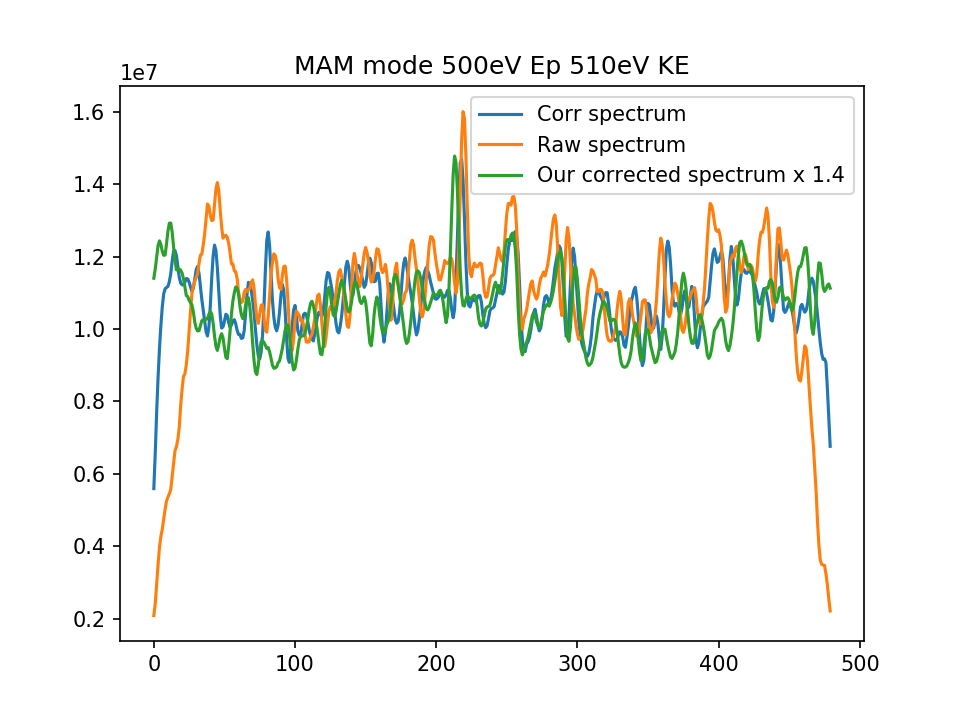

In [15]:
plt.figure()
plt.title("MAM mode 500eV Ep 510eV KE")
plt.plot(np.sum(corr, axis = 1), label = "Corr spectrum")
plt.plot(np.sum(raw, axis = 1), label = "Raw spectrum")
plt.plot(1.4*np.sum(dst, axis = 1), label = "Our corrected spectrum x 1.4")
#plt.xlabel("longitu")
plt.legend()
plt.show()

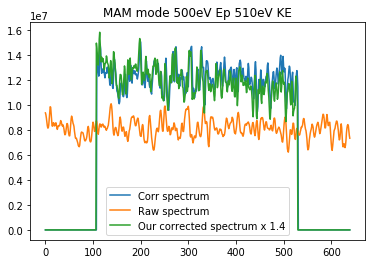

In [8]:
plt.figure()
plt.title("MAM mode 500eV Ep 510eV KE")
plt.plot(np.sum(corr, axis = 0), label = "Corr spectrum")
plt.plot(np.sum(raw, axis = 0), label = "Raw spectrum")
plt.plot(1.4*np.sum(dst, axis = 0), label = "Our corrected spectrum x 1.4")
#plt.xlabel("longitu")
plt.legend()
plt.show()